In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
path = 'C:/Users/mbiv104/Desktop/py_test'
trackmate_yfp_file = path + '/' + 'export2.csv'
scale = '100'


csv_folder = path + '/YFP/imagej_' + scale + '/merged'
output_path = path + '/track'


In [23]:
# Read the CSV file while skipping the 2nd and 3rd rows
df = pd.read_csv(trackmate_yfp_file, skiprows=[1, 2, 3])

# Write the remaining data to a new CSV file
df.to_csv(trackmate_yfp_file, index=False)


In [22]:
df = pd.read_csv(trackmate_yfp_file)
columns_to_delete = ['LABEL', 'QUALITY', 'POSITION_Z', 'POSITION_T', 'VISIBILITY', 'MANUAL_SPOT_COLOR', 'MEAN_INTENSITY_CH1', 'MEDIAN_INTENSITY_CH1', 'MIN_INTENSITY_CH1', 'MAX_INTENSITY_CH1', 'TOTAL_INTENSITY_CH1', 'STD_INTENSITY_CH1', 'CONTRAST_CH1', 'SNR_CH1', 'ELLIPSE_X0', 'ELLIPSE_Y0', 'ELLIPSE_MAJOR', 'ELLIPSE_MINOR', 'ELLIPSE_THETA', 'ELLIPSE_ASPECTRATIO', 'PERIMETER', 'CIRCULARITY', 'SOLIDITY', 'SHAPE_INDEX']
df = df.drop(columns=columns_to_delete)
df.rename(columns={'ID': 'cellid'}, inplace=True)
df.to_csv(trackmate_yfp_file, index=False)

C:\Users\mbiv104\AppData\Local\Temp\ipykernel_5536\3366550235.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(trackmate_yfp_file)


In [24]:
cellid = 19630

In [25]:
os.makedirs(output_path, exist_ok=True)
# Read the CSV file into a pandas DataFrame
data = pd.read_csv(trackmate_yfp_file, low_memory=False)

# Find the TRACK_ID corresponding to the given ID
track_id = data[data['cellid'] == cellid]['TRACK_ID'].iloc[0]

# Filter rows with the same TRACK_ID
filtered_data = data[data['TRACK_ID'] == track_id]

# Save the filtered data to a CSV file named "track_i.csv" where i is the value of TRACK_ID
output_file = output_path + '/' + f'track_{track_id}.csv'
filtered_data[['cellid', 'FRAME']].to_csv(output_file, index=False)
print("Output File: " + f'track_{track_id}.csv')

Output File: track_1258.csv


In [26]:
df_first = pd.read_csv(output_file)

# Create an empty list to store DataFrames of appended rows
appended_dfs = []

# Iterate through rows of the first CSV file
for index, row in df_first.iterrows():
    frame_value = row['FRAME']
    cellid_value = row['cellid']
    
    # Calculate the corresponding CSV file name
    corresponding_csv_name = str(frame_value + 1) + '.csv'
    corresponding_csv_path = os.path.join(csv_folder, corresponding_csv_name)
    
    # Check if the corresponding CSV file exists
    if os.path.exists(corresponding_csv_path):
        # Read the corresponding CSV file
        df_corresponding = pd.read_csv(corresponding_csv_path)
        
        # Search for the cellid_value in the corresponding CSV file
        matching_row = df_corresponding[df_corresponding['cellid'] == cellid_value]
        
        # If a matching row is found, append it to the list of DataFrames
        if not matching_row.empty:
            appended_dfs.append(matching_row)


appended_rows = pd.concat(appended_dfs, ignore_index=True)
df1 = pd.read_csv(output_file)
merged_df = pd.merge(appended_rows, df1, on='cellid', how='left')
merged_df.to_csv(output_file, index=False)


In [27]:
# Read the CSV file into a DataFrame
df = pd.read_csv(output_file)

# Define the column by which you want to sort the CSV file
sort_column = 'FRAME'

# Sort the DataFrame by the specified column
sorted_df = df.sort_values(by=sort_column)

sorted_df.to_csv(output_file, index=False)

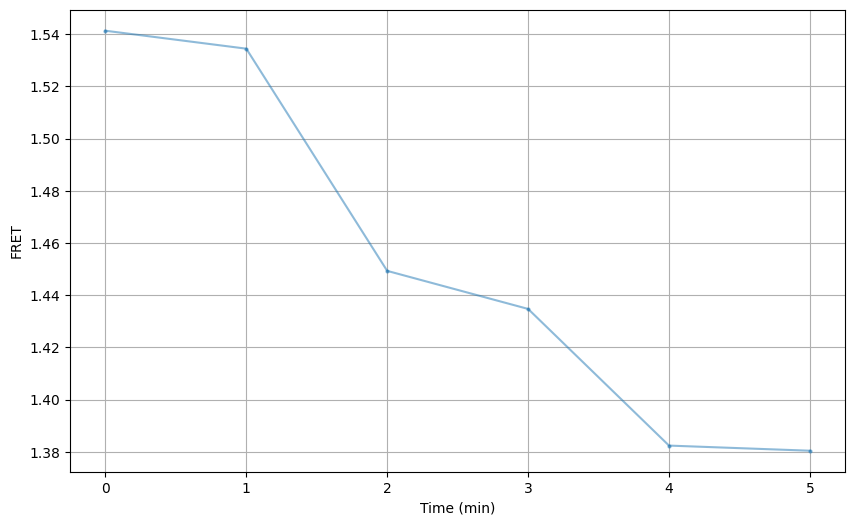

In [28]:

# Load your CSV data into a DataFrame (assuming your file is named 'data.csv')
df = pd.read_csv(output_file)

# Extract the 'FRAME' and 'FRET' columns
frame = df['FRAME']
fret = df['FRET']

# Calculate x-values by multiplying 'FRAME' by 5
x_values = frame
df['vel'] = df['XM'].diff() / df['FRAME'].diff()
# Create a line plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(x_values, fret, marker='o', linestyle='-', markersize=2, alpha=0.5)  # Customize the marker style, line style, and markersize

# Set labels for the axes and a title for the plot
plt.xlabel('Time (min)')
plt.ylabel('FRET')
plt.title('')

# Show the plot
plt.grid(True)  # Optional: Add a grid
plt.show()


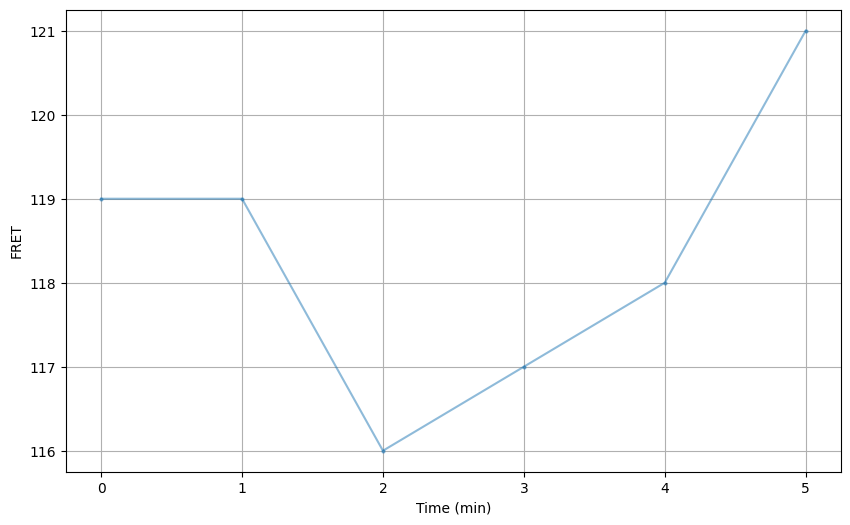

In [29]:

# Load your CSV data into a DataFrame (assuming your file is named 'data.csv')
df = pd.read_csv(output_file)

# Extract the 'FRAME' and 'FRET' columns
frame = df['FRAME']
fret = df['Area']

# Calculate x-values by multiplying 'FRAME' by 5
x_values = frame
df['vel'] = df['XM'].diff() / df['FRAME'].diff()
# Create a line plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(x_values, fret, marker='o', linestyle='-', markersize=2, alpha=0.5)  # Customize the marker style, line style, and markersize

# Set labels for the axes and a title for the plot
plt.xlabel('Time (min)')
plt.ylabel('FRET')
plt.title('')

# Show the plot
plt.grid(True)  # Optional: Add a grid
plt.show()
